## 인사혁신처 소청사례
* https://sochung.mpm.go.kr/home/user/board_list.do?PAGE_FLAG=EXSR&PAGE_MODE=LIST

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="AppleGothic")

In [2]:
# url = "https://raw.githubusercontent.com/corazzon/sochung-mpm/master/sochung.csv"

In [3]:
# df = pd.read_csv(url)
df = pd.read_csv("sochung.csv")
df.shape

(4943, 8)

In [4]:
df.head()

,번호,사건번호,원처분,비위유형,결정유형,결정일자,내용,IDX
0,4939,20190660,해임,금품수수(향응수수),감경,2020-01-16,금품향응수수 (해임 → 강등) 1. 원처분 사유 요지 소청인은 자신의 지인인 A가...,5719868
1,4938,20190737,견책,품위손상,기각,2020-02-11,"폭력행위(일반), 부적절언행(욕설 등), 기타불이익처분 (견책, 전보 → 기각) 1...",5719539
2,4937,20190718,견책,품위손상,감경,2020-02-04,폭력행위(일반) (견책 → 불문경고) 1. 원처분 사유 요지 소청인은 ’○○. ○...,5719526
3,4936,20190665,감봉1월,품위손상,감경,2020-01-09,품위손상 (감봉1월 → 견책) 1. 원처분 사유 요지 ’○○. ○. ○. ○○경 ...,5719523
4,4935,20190668,직권면직,기타,기각,2020-02-20,기타불이익처분 (직권면직 → 기각) 1. 원처분 사유 요지 소청인은 ’1○. ○....,5719518


In [5]:
df.tail()

,번호,사건번호,원처분,비위유형,결정유형,결정일자,내용,IDX
4938,5,19980143,감봉2월,사건묵살,기각,1998-04-24,도박사건 묵살(98-143 감봉2월→기각) 사 건 : 98-143 감봉2월 처분 취...,1197
4939,4,19980134,직권면직,근무태만,기각,1998-04-15,시보기간중 근무태도 불성실(98-134 면직→기각) 사 건 : 98-134 면직 처...,1196
4940,3,19980100,해임,지시명령위반,기각,1998-04-08,탈주범 검거 실패(98-100ㆍ101 각 해임→ 각 기각) 사 건 : 98-100ㆍ...,1195
4941,2,19980059,견책,근무태만,기각,1998-03-18,근무중 권총을 풀어놓고 좀(98-59 견책→기각) 사 건 : 98-59 견책 처분 ...,1194
4942,1,19980001,감봉3월,직무태만(업무처리 소홀),기각,1998-02-27,우편물 배달 소홀(98-1 감봉3월→기각) 사 건 : 98-1 감봉3월 처분 취소 ...,1193


In [6]:
df.isnull().sum()

번호        0
사건번호      0
원처분       0
비위유형      1
결정유형      8
결정일자    291
내용        1
IDX       0
dtype: int64

In [7]:
df["사건연도"] = df["사건번호"].map(lambda x : x[:4])

In [8]:
no_2110 = df[df["사건연도"] == "2110"]
no_2110

,번호,사건번호,원처분,비위유형,결정유형,결정일자,내용,IDX,사건연도
3758,1185,2110104,감봉1월,지시명령위반,기각,NaN,정기재산변동신고 불성실(감봉1월→기각) 처분요지 : 2009. 12. 31.기준 정...,2384,2110


In [9]:
# 사건연도가 2110으로 되어 있는 데이터의 연도를 변경
df.loc[no_2110.index, "사건연도"] = "2010"

Text(0.5, 1.0, '사건연도별 건 수')

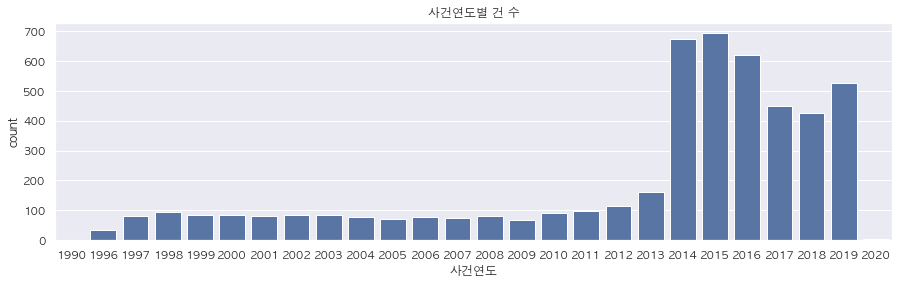

In [10]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="사건연도", color="b").set_title("사건연도별 건 수")

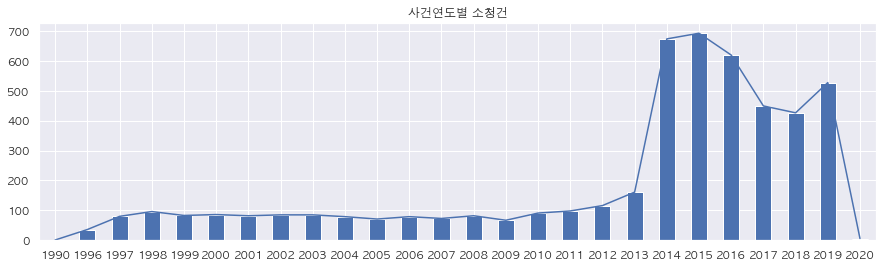

In [11]:
year_count = df["사건연도"].value_counts().sort_index()
year_count.plot(figsize=(15, 4))
year_count.plot.bar(figsize=(15, 4), title="사건연도별 소청건", rot=0)

In [12]:
df["연도"] = df["결정일자"].str.split("-", expand=True)[0]
df["월"] = df["결정일자"].str.split("-", expand=True)[1]
df["일"] = df["결정일자"].str.split("-", expand=True)[2]

In [13]:
df[df["연도"] == "1998116"]

,번호,사건번호,원처분,비위유형,결정유형,결정일자,내용,IDX,사건연도,연도,월,일
4378,565,19970924,해임,금품수수(향응수수),기각,1998116,교통사고 청탁 금품 받음(97-924 해임→기각) 사 건 : 97-924 해임 처분...,1761,1997,1998116,None,None


In [14]:
# 결정일자 기준 2010~2014년까지 결정일자 공백이 있음
year_month_count = df.groupby(["연도", "월"])["번호"].count().unstack().fillna(0).astype(int)
year_month_count.style.background_gradient(axis=0)

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
1996,2,2,5,6,2,0,1,3,6,3,5,1
1997,7,17,5,2,5,0,8,7,5,6,10,7
1998,0,3,6,7,9,10,8,10,8,4,4,9
1999,9,4,11,6,10,10,3,8,6,7,17,8
2000,3,5,3,5,4,7,10,10,11,10,6,0
2001,1,13,11,7,14,10,8,5,6,8,1,4
2002,5,0,9,9,14,7,6,5,7,5,7,12
2003,8,19,18,11,4,3,2,12,6,1,6,3
2004,6,4,1,4,7,5,7,9,7,10,12,8


## 비위유형

In [15]:
df["비위유형"].unique()

array(['금품수수(향응수수)', '품위손상', '기타', '직권남용', '공금횡령및유용', '직무태만및유기', '지시명령위반',
       '복종위반', '비밀누출', '공문서위조및변조', '감독태만', nan, '공금횡령 및 유용', '직무태만 및 유기',
       '공문서위조 및 변조', '직무태만(업무처리 소홀)', '근무태만', '금품·향응수수', '근무이탈',
       '기타 품위유지', '일반교통사고', '직권면직', '의원면직', '영리업무 겸직금지', '공문서 위·변조',
       '비밀엄수 의무', '업무관련 물의', '뇌물수수', '불륜관계', '허위보고 및 지시', '채권·채무관계',
       '음주운전', '도박행위', '하극상', '전보발령', '친절·공정 의무', '상관부하간 수뢰', '전·의경 구타',
       '음주·폭행', '사건묵살', '격하처리', '알선수수', '당연퇴직', '집단행위금지', '폭력·협박 행사',
       '회계관련 물의', '직무유기'], dtype=object)

In [16]:
df["비위유형(원본)"] = df["비위유형"]

In [17]:
# 결측치 확인
df["비위유형(원본)"].isnull().sum()

1

In [18]:
# 텍스트처리를 위해 결측치를 빈문자열로 치환
df["비위유형"] = df["비위유형"].fillna("")

In [19]:
df.loc[df["비위유형"].str.contains("금품|향응"), "비위유형"] = "금품·향응수수"
df.loc[df["비위유형"] == "공금횡령및유용", "비위유형"] = "공금횡령 및 유용"
df.loc[df["비위유형"].str.contains("직무태만및유기|직무유기|직무태만"), "비위유형"] = "직무태만 및 유기"
df.loc[df["비위유형"].str.contains("공문서|변조"), "비위유형"] = "공문서위조 및 변조"

In [20]:
print(df["비위유형"].nunique())
df["비위유형"].unique()

40


array(['금품·향응수수', '품위손상', '기타', '직권남용', '공금횡령 및 유용', '직무태만 및 유기',
       '지시명령위반', '복종위반', '비밀누출', '공문서위조 및 변조', '감독태만', '', '근무태만', '근무이탈',
       '기타 품위유지', '일반교통사고', '직권면직', '의원면직', '영리업무 겸직금지', '비밀엄수 의무',
       '업무관련 물의', '뇌물수수', '불륜관계', '허위보고 및 지시', '채권·채무관계', '음주운전', '도박행위',
       '하극상', '전보발령', '친절·공정 의무', '상관부하간 수뢰', '전·의경 구타', '음주·폭행', '사건묵살',
       '격하처리', '알선수수', '당연퇴직', '집단행위금지', '폭력·협박 행사', '회계관련 물의'],
      dtype=object)

In [21]:
request_type = df["비위유형"].value_counts()
request_type

품위손상          1222
기타             876
직무태만 및 유기      857
금품·향응수수        722
지시명령위반         511
감독태만           194
공금횡령 및 유용      144
직권남용            93
복종위반            70
비밀누출            62
기타 품위유지         25
공문서위조 및 변조      23
근무태만            23
뇌물수수            17
불륜관계            16
음주운전            11
업무관련 물의          7
비밀엄수 의무          6
직권면직             6
사건묵살             6
음주·폭행            5
도박행위             5
의원면직             5
하극상              4
허위보고 및 지시        4
채권·채무관계          4
일반교통사고           3
영리업무 겸직금지        3
회계관련 물의          3
근무이탈             3
친절·공정 의무         2
알선수수             2
전보발령             2
당연퇴직             1
격하처리             1
집단행위금지           1
상관부하간 수뢰         1
폭력·협박 행사         1
전·의경 구타          1
                 1
Name: 비위유형, dtype: int64

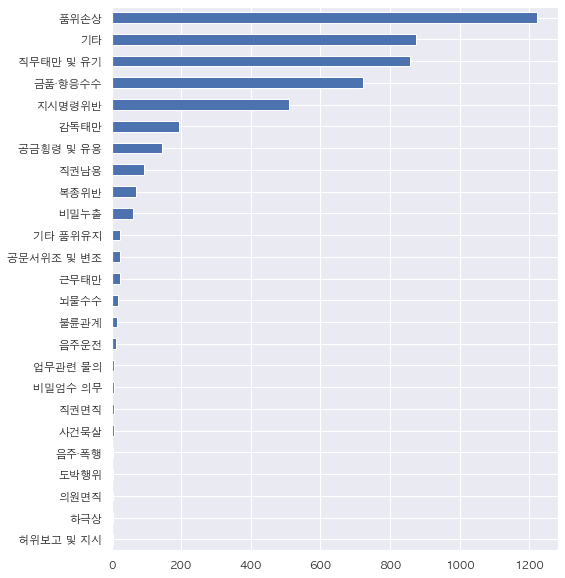

In [22]:
request_type[:25].sort_values().plot.barh(figsize=(8, 10))

## 결정유형

* 각하
    1.	법률 행정법에서, 국가 기관에 대한 행정상 신청을 배척하는 처분.
    2.	법률 민사 소송법에서, 소(訴)나 상소가 형식적인 요건을 갖추지 못한 경우, 부적법한 것으로 하여 내용에 대한 판단 없이 소송을 종료하는 일.


* 기각
    1. 송을 수리한 법원이, 소나 상소가 형식적인 요건은 갖추었으나, 그 내용이 실체적으로 이유가 없다고 판단하여 소송을 종료하는 일.
    

* 감경
    1. 본래 정하여진 형벌보다 가벼운 형벌에 처함. 또는 그런 형벌에 처하여짐.

    
<출처 : 네이버 국어사전>

In [23]:
request_result = df.groupby(["비위유형", "결정유형"])["번호"].count().unstack().fillna(0).astype(int)
request_result.style.background_gradient()

결정유형,각하,감경,기각,기타,무효확인,취소
비위유형,,,,,,
,0,0,1,0,0,0
감독태만,0,54,101,3,0,36
격하처리,0,1,0,0,0,0
공금횡령 및 유용,0,43,93,0,0,8
공문서위조 및 변조,0,8,14,0,1,0
근무이탈,0,1,1,0,1,0
근무태만,0,8,9,0,0,6
금품·향응수수,8,132,521,7,5,49
기타,77,173,520,21,4,78


In [24]:
# 감경 건이 많은 비위유형으로 정렬
request_result["감경"].sort_values(ascending=False)

비위유형
품위손상          417
직무태만 및 유기     273
지시명령위반        184
기타            173
금품·향응수수       132
감독태만           54
공금횡령 및 유용      43
직권남용           29
비밀누출           19
복종위반           19
기타 품위유지        10
근무태만            8
공문서위조 및 변조      8
음주운전            6
비밀엄수 의무         4
허위보고 및 지시       3
사건묵살            3
불륜관계            3
채권·채무관계         3
하극상             3
음주·폭행           2
뇌물수수            2
회계관련 물의         2
근무이탈            1
도박행위            1
격하처리            1
알선수수            1
업무관련 물의         1
영리업무 겸직금지       1
상관부하간 수뢰        0
당연퇴직            0
의원면직            0
일반교통사고          0
전·의경 구타         0
전보발령            0
직권면직            0
집단행위금지          0
친절·공정 의무        0
폭력·협박 행사        0
                0
Name: 감경, dtype: int64

## 감경여부

In [25]:
df["감경"] = df["결정유형"] == "감경"

In [26]:
# 전체 건 중 감경건수
df["감경"].value_counts()

False    3537
True     1406
Name: 감경, dtype: int64

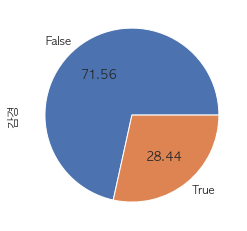

In [27]:
감경비율 = df["감경"].value_counts(normalize=True)
감경비율.plot.pie(autopct='%.2f')

In [28]:
result = df.groupby(["비위유형", "감경"])["번호"].count().unstack().fillna(0).astype(int)
result["전체"] = result[True] + result[False]
result["감경비율"] = (result[True] / result["전체"]) * 100
result

감경,False,True,전체,감경비율
비위유형,,,,
,1,0,1,0.000000
감독태만,140,54,194,27.835052
격하처리,0,1,1,100.000000
공금횡령 및 유용,101,43,144,29.861111
공문서위조 및 변조,15,8,23,34.782609
근무이탈,2,1,3,33.333333
근무태만,15,8,23,34.782609
금품·향응수수,590,132,722,18.282548
기타,703,173,876,19.748858


In [29]:
result[result["전체"] > 100]

감경,False,True,전체,감경비율
비위유형,,,,
감독태만,140,54,194,27.835052
공금횡령 및 유용,101,43,144,29.861111
금품·향응수수,590,132,722,18.282548
기타,703,173,876,19.748858
지시명령위반,327,184,511,36.007828
직무태만 및 유기,584,273,857,31.855309
품위손상,805,417,1222,34.124386


## 원처분

In [30]:
df["원처분"].describe()

count     4943
unique     102
top         견책
freq      1299
Name: 원처분, dtype: object

In [31]:
df["원처분"].unique()

array(['해임', '견책', '감봉1월', '직권면직', '감봉3월', '징계부가금', '강등', '정직1월',
       '호봉정정처분', '정직2월', '기타', '감봉2월', '정직3월', '불문경고', '경고', '호봉정정거부처분',
       '호봉획정', '파면', '재직기간 불인정', '재직기간불인정', '징계부가금2배', '주의', '부작위',
       '징계부가금1배', '임용취소', '대기발령', '직위해제', '유사경력불인정', '승진임용이행',
       '직위해제 처분 무효확인', '승진임용 거부처분 취소청구', '의무이행', '전보', '정잭1월', '이행청구',
       '견책 및 징계부가금 1배', '근속승진누락', '직권경고', '징계부가금3배', '기타불이익', '의원면직',
       '당연퇴직', '징계부가금 2배', '정직3월/직권면직', '징계부가금(2배)', '징계부가금 3배', '고충명부삭제',
       '감등', '호봉정정', '호봉승급제한', '(인사)경고', '징게부가금', '수사경과해제', '정지1월',
       '기타(호봉정정)', '경고(인사)', '무효확인', '전출부동의', '징계면직', '승격취소',
       '초임호봉 정정 불가 처분', '징계부가금 1배', '김성훈', '근속승진 제외', '승진임용 취소', '기각',
       '특진자결정', '승진임용취소', '호봉합산거부', '경과해제', '징계부가금5배', '쇄신대상자 선정',
       '특채 임용취소', '근속승진임용 이행', '경과변경', '인사특전 부작위 이행', '명예퇴직수당 지급신청서 반려',
       '호봉정정거부', '호봉승급 불합격', '기각계고', '대우공무원선발 이행', '호봉합산 거부', '임용제외',
       '승진임용누락', '5급승진시험거부', '정근수당지급', '육아휴직거부', '인사발령', '승진취소',
       '특별승진 임용 청구', '인사명령', '육아휴직', '

In [32]:
df["원처분"].value_counts().head(10)

견책       1299
해임        655
감봉1월      524
파면        410
정직1월      326
징계부가금     230
감봉2월      211
정직3월      210
강등        187
감봉3월      173
Name: 원처분, dtype: int64

In [33]:
table = pd.pivot_table(data=df, 
                       index="원처분", columns="감경", 
                       values="번호", aggfunc="count", fill_value=0)
table[table[True] > 5]

감경,False,True
원처분,,
감봉1월,324,200
감봉2월,133,78
감봉3월,104,69
강등,118,69
견책,986,313
정직1월,183,143
정직2월,96,44
정직3월,136,74
징계부가금,221,9


* 해임
    * 어떤 지위나 맡은 임무를 그만두게 함.

* 파면 
    * 징계 절차를 거쳐 임면권자의 일방적 의사에 의하여 공무원 관계를 소멸시키거나 관직을 박탈하는 행정 처분.
    
<출처 : 네이버 국어사전>

In [34]:
df_out = df[df["원처분"] == "파면"]
df_out["비위유형"].value_counts()

금품·향응수수       186
품위손상           92
기타             30
공금횡령 및 유용      25
지시명령위반         22
직무태만 및 유기      14
뇌물수수           11
공문서위조 및 변조      6
비밀누출            6
직권남용            5
근무태만            2
알선수수            2
기타 품위유지         1
불륜관계            1
채권·채무관계         1
영리업무 겸직금지       1
음주운전            1
근무이탈            1
음주·폭행           1
도박행위            1
                1
Name: 비위유형, dtype: int64

In [35]:
table = pd.pivot_table(data=df, index=["비위유형", "결정유형"], 
                       columns="원처분", values="번호", 
                       aggfunc="count", fill_value=0)
table

원처분             (인사)경고  5급승진시험거부  감등  감봉1월  감봉1월,전보취소  감봉2월  감봉3월  강등  견책  \
비위유형      결정유형                                                              
          기각         0         0   0     0          0     0     0   0   0   
감독태만      감경         0         0   0    17          0     7     3   0  21   
          기각         0         0   0     9          0    10     4   0  64   
          기타         0         0   0     1          0     0     1   0   1   
          취소         0         0   0     1          0     0     0   0  27   
...                ...       ...  ..   ...        ...   ...   ...  ..  ..   
하극상       기각         0         0   0     0          0     1     0   0   0   
허위보고 및 지시 감경         0         0   0     0          0     0     0   0   0   
          기각         0         0   0     1          0     0     0   0   0   
회계관련 물의   감경         0         0   0     1          0     0     0   0   0   
          기각         0         0   0     0          0     0     0   0   0   

원처분             견책 및 징계부가금 1배  ...  해임  호봉승급 불합격  호봉승급제한  호봉정정  호봉정정거부  \
비위유형      결정유형                 ...                                       
          기각                0  ...   0         0       0     0       0   
감독태만      감경                0  ...   0         0       0     0       0   
          기각                0  ...   0         0       0     0       0   
          기타                0  ...   0         0       0     0       0   
          취소                0  ...   0         0       0     0       0   
...                       ...  ...  ..       ...     ...   ...     ...   
하극상       기각                0  ...   0         0       0     0       0   
허위보고 및 지시 감경                0  ...   2         0       0     0       0   
          기각                0  ...   0         0       0     0       0   
회계관련 물의   감경                0  ...   0         0       0     0       0   
          기각                0  ...   1         0       0     0       0   

원처분             호봉정정거부처분  호봉정정처분  호봉합산 거부  호봉합산거부  호봉획정  
비위유형      결정유형                                           
          기각           0       0        0       0     0  
감독태만      감경           0       0        0       0     0  
          기각           0       0        0       0     0  
          기타           0       0        0       0     0  
          취소           0       0        0       0     0  
...                  ...     ...      ...     ...   ...  
하극상       기각           0       0        0       0     0  
허위보고 및 지시 감경           0       0        0       0     0  
          기각           0       0        0       0     0  
회계관련 물의   감경           0       0        0       0     0  
          기각           0       0        0       0     0  

[107 rows x 101 columns]

In [36]:
table.loc[( table["해임"] > 0 ) | ( table["파면"] > 0 ), ["해임", "파면"]]

원처분               해임  파면
비위유형       결정유형         
           기각      0   1
공금횡령 및 유용  감경     13   5
           기각     23  20
           취소      1   0
공문서위조 및 변조 감경      3   2
...              ...  ..
품위손상       기각    114  45
           취소      3   1
하극상        감경      2   0
허위보고 및 지시  감경      2   0
회계관련 물의    기각      1   0

[63 rows x 2 columns]